**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 1 - Regresión Lineal

In [1]:
import pandas as pd

In [53]:
df = pd.read_csv('202420_Laboratorio 1 - Regresión_train_data.csv')

In [3]:
df.shape

(1000, 23)

### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


### Estadísticas descriptivas

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


#### Niveles de variables categóricas

In [6]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=df[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

In [7]:
df['dolor_NRS'].value_counts()

dolor_NRS
#BOÞ!    440
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
9          1
Name: count, dtype: int64

In [8]:
d_dolor = df[df['Dolor']==1]
d_dolor['dolor_NRS'].value_counts()

dolor_NRS
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
#BOÞ!      2
9          1
Name: count, dtype: int64

In [9]:
d_murte = df[df['Disposicion']==7]

d_dolor['dolor_NRS'].value_counts()


dolor_NRS
3        209
4        111
5        109
6         59
2         31
7         27
8          8
10         3
1          2
#BOÞ!      2
9          1
Name: count, dtype: int64

In [10]:
df['Modo_Llegada'].value_counts()

Modo_Llegada
3    588
2    220
4    122
1     60
6      7
5      2
7      1
Name: count, dtype: int64

In [11]:
#Número de faltantes por columna
nan_count_per_column = df.isna().sum()
print(nan_count_per_column)

Grupo                         0
Sexo                          0
Edad                          0
Modo_Llegada                  0
Lesion                        0
Queja_Principal               0
Estado_Mental                 0
Dolor                         0
dolor_NRS                     0
SBP                          17
DBP                          21
HR                           12
RR                           15
BT                           11
Saturacion                  556
KTAS_enfermera                0
Diagnostico_En_Urgencias      1
Disposicion                   0
KTAS_experto                  0
Grupo_De_Error                0
Duracion_Estancia_Min         0
Duracion_KTAS_Min             0
Error_Triaje                  0
dtype: int64


In [12]:
t=10100
above_t = df[df["Duracion_Estancia_Min"] > t].shape[0]
below_t = df[df["Duracion_Estancia_Min"] <= t].shape[0]

print(f"Ocurrencias por encima de {t}: {above_t}")
print(f"Ocurrencias por debajo o igual a {t}: {below_t}")


df["Duracion_Estancia_Min"].describe()


Ocurrencias por encima de 10100: 50
Ocurrencias por debajo o igual a 10100: 950


count      1000.000000
mean      12792.480000
std       87721.151446
min           0.000000
25%         132.750000
50%         270.500000
75%         620.000000
max      709510.000000
Name: Duracion_Estancia_Min, dtype: float64

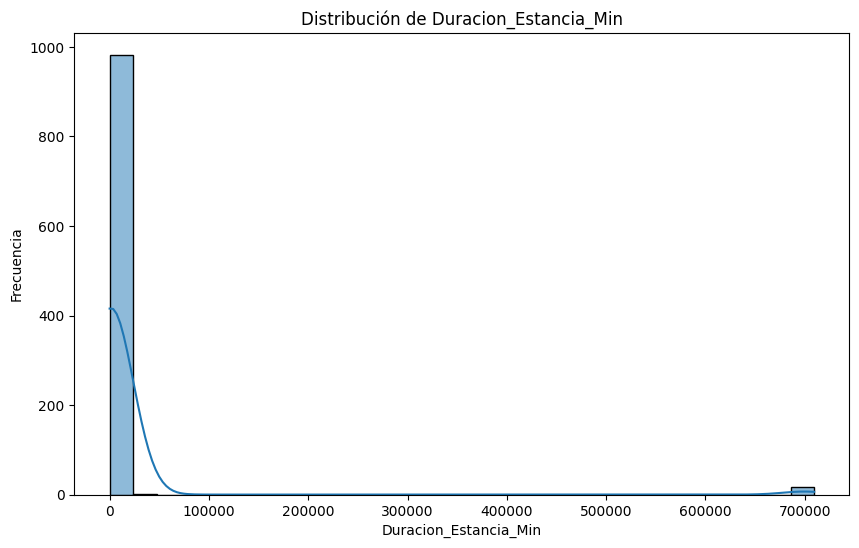

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


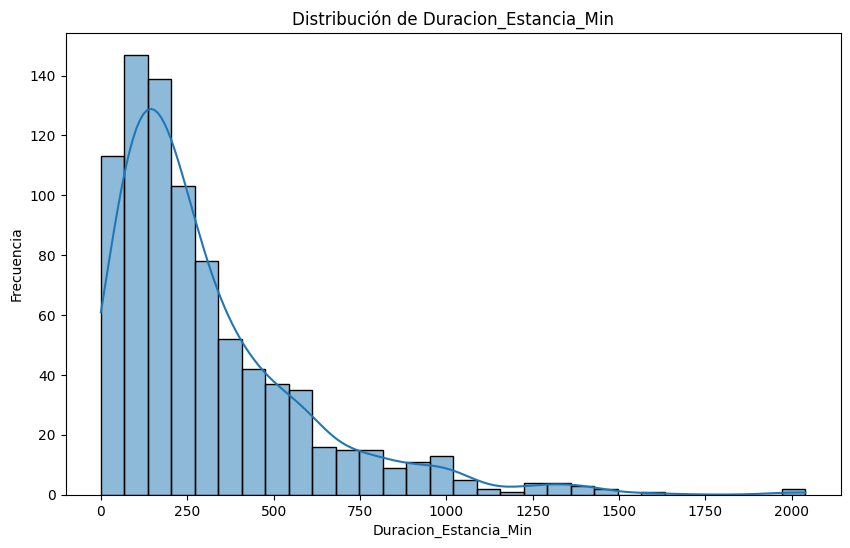

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[df["Duracion_Estancia_Min"] <= 5000]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


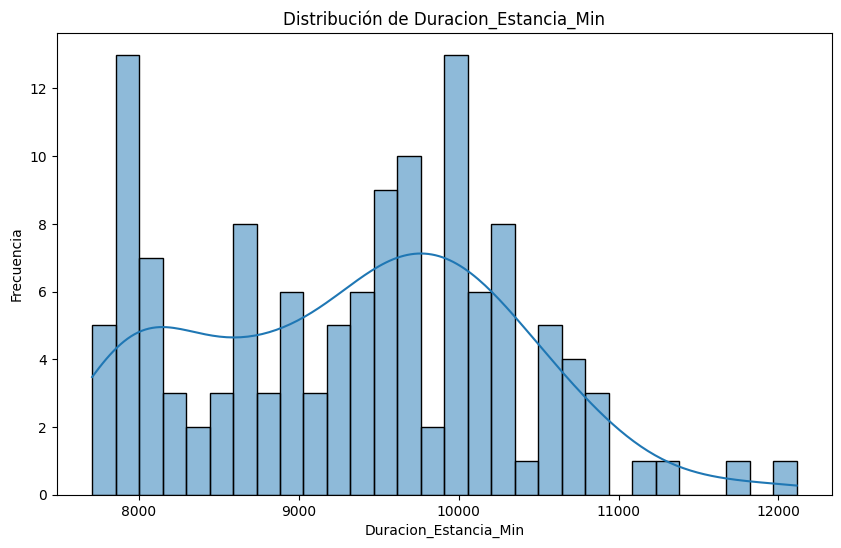

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 5000) & (df["Duracion_Estancia_Min"] <= 14000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


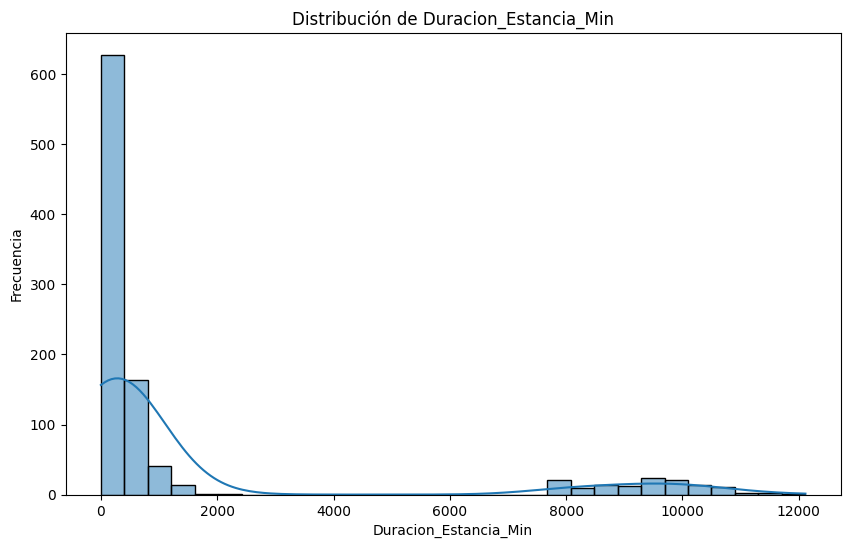

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 0) & (df["Duracion_Estancia_Min"] <= 14000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


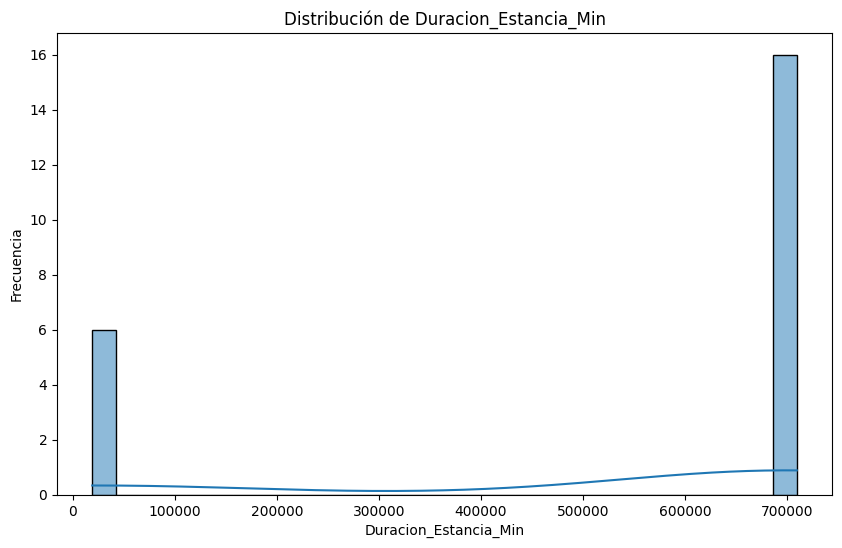

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del gráfico
plt.figure(figsize=(10, 6))

# Gráfico de distribución usando seaborn
sns.histplot(df[(df["Duracion_Estancia_Min"] >= 14000)]["Duracion_Estancia_Min"], bins=30, kde=True)

# Añadir título y etiquetas
plt.title("Distribución de Duracion_Estancia_Min")
plt.xlabel("Duracion_Estancia_Min")
plt.ylabel("Frecuencia")

# Mostrar el gráfico
plt.show()


In [30]:
# Eliminar las filas donde Duracion_Estancia_Min > 10100
df = df[df["Duracion_Estancia_Min"] <= 2100]
df["Duracion_Estancia_Min"].describe()


count     849.000000
mean      308.449941
std       285.380122
min         0.000000
25%       118.000000
50%       216.000000
75%       411.000000
max      2040.000000
Name: Duracion_Estancia_Min, dtype: float64

### Resumen de las Variables

| Variable                  | Tipo                                     | Valores                 | Media     | Desviación Estándar | Rango                   | Número de Datos |
|---------------------------|------------------------------------------|-------------------------|-----------|---------------------|-------------------------|-----------------|
| Grupo                     | Categórica (1 o 2)                       | 1, 2                    | 1.45      | 0.50                | 1 a 2                   | 1000            |
| Sexo                      | Categórica (1=Hombre, 2=Mujer)           | 1, 2                    | 1.51      | 0.50                | 1 a 2                   | 1000            |
| Edad                      | Continua                                 | -                       | 53.89     | 19.83               | 16 a 94 años            | 1000            |
| Modo_Llegada              | Categórica con 7 niveles                 | 1 a 7                   | 2.81      | 0.80                | 1 a 7                   | 1000            |
| Lesion                    | Categórica binaria (1=Sí, 2=No)          | 1, 2                    | 1.20      | 0.40                | 1 a 2                   | 1000            |
| Queja_Principal           | Categórica (descripción textual)         | Variados*                | -         | -                   | -                       | 1000            |
| Estado_Mental             | Categórica ordinal (1 a 4)               | 1 a 4                   | 1.10      | 0.43                | 1 a 4                   | 1000            |
| Dolor                     | Categórica binaria (0=No, 1=Sí)          | 0, 1                    | 0.56      | 0.50                | 0 a 1                   | 1000            |
| dolor_NRS                 | Categórica ordinal (0 a 10)              | 1 a 10                  | 1.10      | 1.68                | 1 a 10                  | 1000            |
| SBP (Presión Sistólica)   | Continua                                 | -                       | 133.49    | 27.16               | 50 a 275 mmHg           | 983             |
| DBP (Presión Diastólica)  | Continua                                 | -                       | 79.57     | 15.17               | 31 a 160 mmHg           | 979             |
| HR (Frecuencia Cardíaca)  | Continua                                 | -                       | 84.40     | 16.30               | 32 a 148 lpm            | 988             |
| RR (Frecuencia Respiratoria) | Continua                             | -                       | 19.45     | 2.07                | 14 a 30 rpm             | 985             |
| BT (Temperatura Corporal) | Continua                                 | -                       | 36.56°C   | 0.52                | 35 a 39.8°C             | 989             |
| Saturacion                | Continua                                 | -                       | 97.05%    | 1.41                | 95 a 100%               | 444             |
| KTAS_enfermera            | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.33      | 0.86                | 1 a 5                   | 1000            |
| Diagnostico_En_Urgencias  | Categórica (descripción textual)         | Variados*               | -         | -                   | -                       | 1000            |
| Disposicion               | Categórica con 7 niveles                 | 1 a 7                   | 3.33      | 1.16                | 1 a 7                   | 1000            |
| KTAS_experto              | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.26      | 0.87                | 1 a 5                   | 1000            |
| Grupo_De_Error            | Categórica ordinal (0 a 9)               | 0 a 9                   | 0.57      | 1.59                | 0 a 9                   | 1000            |
| Duracion_Estancia_Min     | Continua                                 | -                       | 12792.48  | 87721.15            | 0 a 709510 minutos      | 1000            |
| Duracion_KTAS_Min         | String                                 | -                       | 2.00      | 1.20                | 1 a 7 minutos           | 1000            |
| Error_Triaje              | Categórica          | 0 a 2                    | 0.25      | 0.63                | 0 a 2                   | 1000            |

*Las variables Queja_Principal y Diagnostico_En_Urgencia tienen 347 y 489 categorías respectivamente


### Limpieza de datos

In [31]:
data = df.copy()

In [32]:
# Conversión de String a float 
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['Duracion_KTAS_Min'].describe()

count    849.000000
mean       5.952544
std        3.537711
min        1.000000
25%        3.180000
50%        5.000000
75%        7.850000
max       17.370000
Name: Duracion_KTAS_Min, dtype: float64

In [33]:
# Se quitan las columnas por la cantidad tan alta de categorías
data=data.drop(columns=['Queja_Principal','Diagnostico_En_Urgencias','Saturacion'])

In [34]:
columnas_imputar = ['SBP', 'DBP', 'HR', 'RR', 'BT']

# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    #data[columna].fillna(data[columna].mean(), inplace=True)
    pass

In [35]:
# Dolor BOP
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))


In [36]:
# Modo_Llegada
data['Modo_Llegada'] = data['Modo_Llegada'].replace(6, 5)
data['Modo_Llegada'] = data['Modo_Llegada'].replace(7, 5)
data['Modo_Llegada'].value_counts()


Modo_Llegada
3    513
2    194
4     75
1     57
5     10
Name: count, dtype: int64

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)**, **dolor_NRS**, **SBP**, **DBP**, **HR**, **RR**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (0 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Selección de Variables para el Modelado

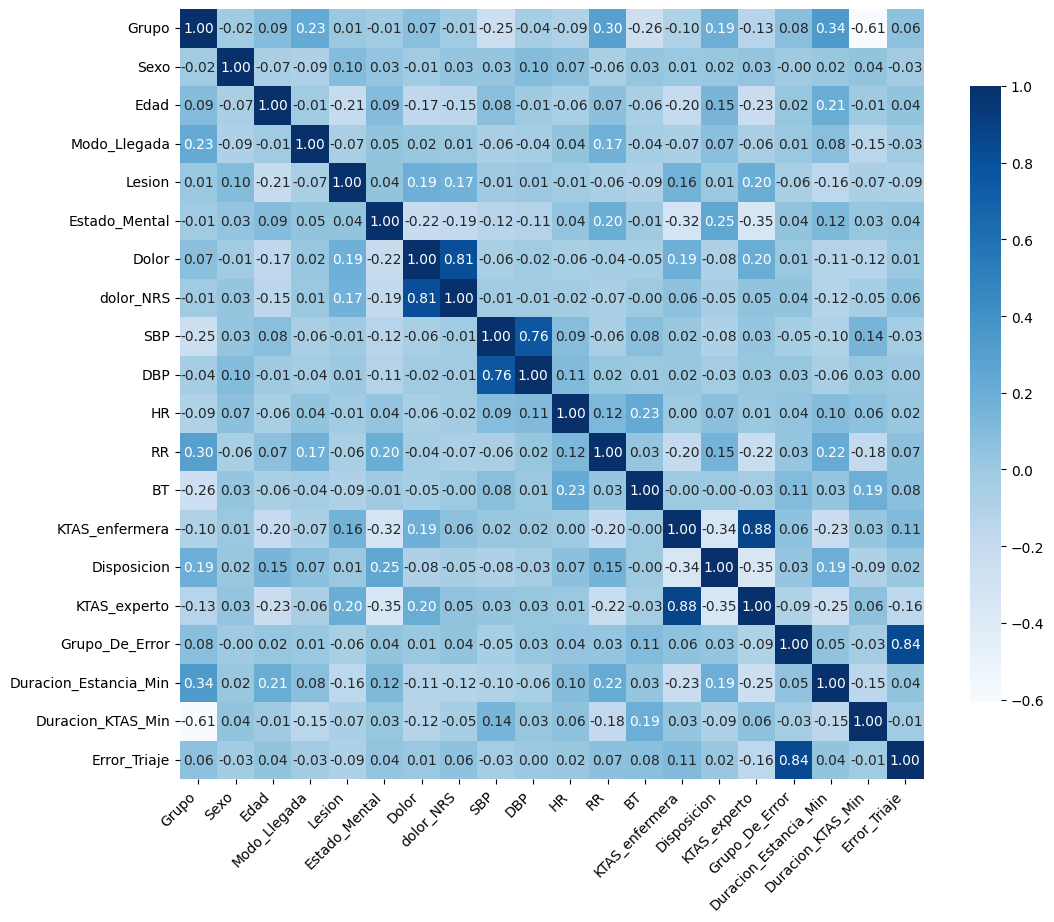

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Estado_Mental',
       'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT', 'KTAS_enfermera',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [37]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)


En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

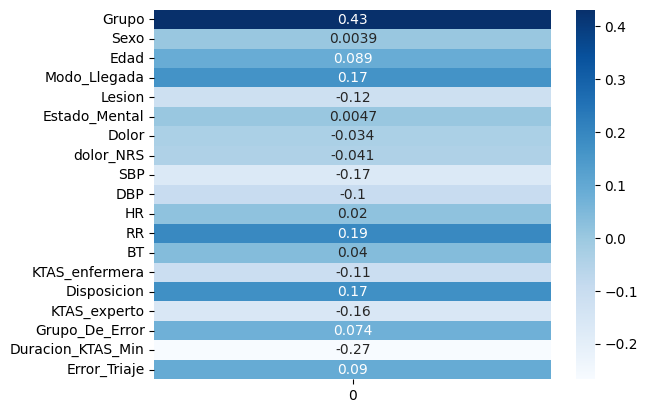

In [68]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Según lo observado en la matriz de correlación con la variable objetivo decidimos eliminar las columnas DBP, KTAS_enfermera y Error_Triaje, ya que tienen una menor correlación con la Duracion_Estancia_Min que SBP, KTAS_experto y Grupo_De_Error respectivamente.

In [38]:
data=data.drop(columns=['DBP', 'KTAS_enfermera', 'Error_Triaje','Dolor','Grupo_De_Error'])

**Information Gain**

In [39]:
from sklearn.feature_selection import mutual_info_classif

def information_gain():
    excluded_columns=['Duracion_Estancia_Min']
    X=data.loc[:, ~data.columns.isin(excluded_columns)]
    Y=data.loc[:, data.columns == 'Duracion_Estancia_Min']

    importances = mutual_info_classif(X, Y)

    # Assuming 'dataframe' is the DataFrame containing your features
    feat_importances = pd.Series(importances, data.columns[0:len(data.columns)-1])

    feat_importances.plot(kind='barh', color='teal')
    plt.show()



**One hot encoding**

In [40]:
columns_to_encode = [ 'Sexo', 'Disposicion', 'KTAS_experto', 'Modo_Llegada', 'Lesion', 'Estado_Mental']

# Aplicamos one hot encoding
data_encoded = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# Visualizamos el DataFrame resultante
print(data_encoded.head())

   Grupo  Edad  dolor_NRS    SBP     HR    RR    BT  Duracion_Estancia_Min  \
0      2    49          2  150.0   92.0  20.0  36.2                   1591   
1      2    30          4  140.0   76.0  20.0  36.3                    211   
2      2    61          3  100.0   84.0  20.0  36.4                    119   
3      2    61          4  120.0   76.0  20.0  36.5                    414   
4      1    67          1  143.0  130.0  20.0  38.1                    267   

   Duracion_KTAS_Min  Sexo_2  Disposicion_2  Disposicion_3  Disposicion_4  \
0                2.0    True           True          False          False   
1                3.0    True          False          False          False   
2                2.0   False          False          False          False   
3                2.0    True          False          False          False   
4                3.6    True          False          False          False   

   Disposicion_5  Disposicion_6  Disposicion_7  KTAS_experto_2  \
0 

**Separar variable objetivo**

In [41]:
excluded_columns = ['Duracion_Estancia_Min']
# Separar la variable objetivo
X = data_encoded.loc[:, ~data_encoded.columns.isin(excluded_columns)]
Y = data_encoded[['Duracion_Estancia_Min']]


Normalización de los datos

In [24]:
from sklearn.preprocessing import MinMaxScaler



scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()

# Normalizar
X_normalized = scaler_features.fit_transform(X)
Y_normalized = scaler_target.fit_transform(Y)

# Datos normalizados
data_normalizada = pd.DataFrame(X_normalized, columns=X.columns)
data_normalizada['Duracion_Estancia_Min'] = Y_normalized

**Train y test normalizados**

In [26]:
from sklearn.model_selection import train_test_split

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    data_normalizada.drop('Duracion_Estancia_Min', axis=1),
    data_normalizada['Duracion_Estancia_Min'],
    test_size=0.2,
    random_state=42
)

**Train y test**

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [43]:
columnas_imputar = ['SBP', 'HR', 'RR', 'BT']

# Imputar valores NaN con la media de cada columna
for columna in columnas_imputar:
    X_train_norm[columna].fillna(X_train_norm[columna].mean(), inplace=True)
    X_test_norm[columna].fillna(X_test_norm[columna].mean(), inplace=True)
   
    X_train[columna].fillna(X_train[columna].mean(), inplace=True)
    X_test[columna].fillna(X_test[columna].mean(), inplace=True)


C:\Users\danie\AppData\Local\Temp\ipykernel_14488\3602474986.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_norm[columna].fillna(X_train_norm[columna].mean(), inplace=True)
C:\Users\danie\AppData\Local\Temp\ipykernel_14488\3602474986.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

### Implementación de modelos

#### Modelo Lineal

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Crear el modelo y entrenarlo
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir y calcular MSE
y_pred_linear= model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred_linear)

# Imprimir coeficientes, intercepto y MSE
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE para el conjunto de prueba: {mse_test:.4f}")
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f"R^2: {r2:.4f}")


Coeficientes: [[ 2.18674192e+02  5.50838477e-01 -6.66104140e+00 -1.08765148e-01
   1.70474234e+00  5.08177937e+00  1.81250457e+01  4.84594992e+00
   1.69578570e+01  2.16939337e+02  1.04982609e+02 -3.12732346e+01
   3.00048320e+01  1.57182060e+02 -1.13379739e+01  2.30861452e+02
   2.68012273e+02  2.26745940e+02  1.43640507e+02  1.40405422e+02
   5.35164329e+01 -1.17020442e+01  1.78040444e+02 -5.95648785e+01
   3.36907677e+01  3.09666829e+02  1.07908041e+02]]
Intercepto: [-1275.18347534]
MSE para el conjunto de prueba: 49058.1001
Root Mean Squared Error: 221.4906
R^2: 0.3405


Ya medimos el desempeño del modelo con el MSE del set de prueba y el modelo no promete mucho. Ahora lo mediremos con el set de entrenamiento usando LOOCV.

##### Cross validation Lineal

In [45]:
from sklearn.model_selection import LeaveOneOut
import numpy as np

loo = LeaveOneOut()
mse_list = []
r2_list = []

Xi=X.copy()
for columna in columnas_imputar:
    Xi[columna].fillna(X[columna].mean(), inplace=True)

for train_index, test_index in loo.split(X):

    # Dividir los datos según LOOCV
    X_train_cv, X_test_cv = Xi.iloc[train_index], Xi.iloc[test_index]
    y_train_cv, y_test_cv = Y.iloc[train_index], Y.iloc[test_index]
   
    model = LinearRegression()
    model.fit(X_train_cv, y_train_cv)

    y_pred_cv = model.predict(X_test_cv)
    
    # MSE
    mse = mean_squared_error(y_test_cv, y_pred_cv)
    mse_list.append(mse)

    # R2
    r2 = r2_score(y_test, y_pred_linear)
    r2_list.append(r2)

# Calcular el MSE promedio
print(sorted(mse_list,reverse=True))
mean_mse = np.mean(mse_list)
rmse = np.sqrt(mean_mse)
mean_r2 = np.mean(r2_list)

print(f"Media del MSE por LOOCV: {mean_mse:.4f}")
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f"R^2: {mean_r2:.4f}")

C:\Users\danie\AppData\Local\Temp\ipykernel_14488\3183797482.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Xi[columna].fillna(X[columna].mean(), inplace=True)


[2588602.318454485, 1722220.8853020696, 1716460.3044062464, 1082231.34240472, 998850.6030447119, 920151.8580025145, 810382.1472890686, 807446.0987572488, 754834.2388760546, 746854.0443971485, 673175.9464451271, 665414.9234210028, 613461.3915129203, 565749.8887166838, 542444.9393872881, 535109.1212582189, 518602.1968470549, 515765.5151307313, 503779.1350773519, 473355.8759286459, 445159.26881230355, 407259.83983386616, 363563.31053072104, 354946.1738235414, 346230.0543112778, 342018.05628494004, 340412.8870453203, 335160.08152553655, 326985.65293875546, 316264.10796654894, 313503.7805682606, 310564.6801776564, 305276.6825615372, 303073.97913457645, 295960.90380951524, 287564.5513246287, 266969.81660871214, 264299.09337354294, 262699.51505412493, 262547.75696603104, 249021.08672985135, 248565.1397393736, 243270.14344563105, 238916.8442938127, 235039.20965648378, 232942.65562006753, 232523.84778661103, 229438.7333687912, 227471.49383841068, 224615.03781083884, 222775.01195279008, 222529.4

### Análisis de resultados

**Intercepto:** Valor de la variable objetivo cuando todas las variables independientes son iguales a cero. En este caso, el intercepto es bastante grande y negativo, lo que podría sugerir que el modelo no captura bien la tendencia central de los datos, o que alguna característica no ha sido adecuadamente normalizada.

**MSE (Mean Squared Error):** Error cuadrático promedio entre los valores predichos por el modelo y los valores reales. Un MSE de 4,619,835 indica que, en promedio, las predicciones del modelo están bastante lejos de los valores reales, lo que sugiere que el modelo tiene un alto nivel de error.

**RMSE (Root Mean Squared Error):** Raíz cuadrada del MSE, proporciona una medida de error en las mismas unidades que la variable objetivo (minutos). Un RMSE de 2,149 minutos es considerablemente alto, lo que refuerza la idea de que el modelo no está prediciendo de manera precisa.

**R^2 (Coeficiente de Determinación):** El R^2 de -0.0369 es un resultado preocupante, pues al ser negativo indica que el modelo está rindiendo peor que un modelo que simplemente predice la media de la variable objetivo. Es decir, el modelo no solo no está capturando la variabilidad de los datos, sino que está haciendo predicciones que son menos útiles que simplemente asumir que todos los valores son iguales a la media.

**Conclusión:** El modelo lineal no está funcionando bien con estos datos. El alto RMSE, el MSE elevado y el R^2 negativo indican que el modelo no está capturando correctamente las relaciones entre las variables independientes y la variable objetivo.

### Pruebas con otros modelos:
##### Modelo lineal normalizado

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear el modelo y entrenarlo
model = LinearRegression()
model.fit(X_train_norm, y_train_norm)

# Predecir y calcular MSE
y_pred_linear_norm = model.predict(X_test_norm)
mse_test = mean_squared_error(y_test_norm, y_pred_linear_norm)
rmse = np.sqrt(mse_test)

# Imprimir coeficientes, intercepto y MSE
print(f"Coeficientes: {model.coef_}")
print(f"Intercepto: {model.intercept_}")
print(f"MSE para el conjunto de prueba: {mse_test:.4f}")
print(f'Root Mean Squared Error: {rmse:.4f}')

# Desnormalizar las predicciones
y_pred_linear = scaler_target.inverse_transform(y_pred_linear_norm.reshape(-1, 1))

# Desnormalizar los valores verdaderos
y_test_linear = scaler_target.inverse_transform(y_test_norm.values.reshape(-1, 1))

# Calcular el MSE en la escala original
mse_test_original_scale = mean_squared_error(y_test_linear, y_pred_linear)
rmse_original_scale = np.sqrt(mse_test_original_scale)
r2 = r2_score(y_test_linear, y_pred_linear)

# Imprimir el MSE en la escala original
print(f"MSE para el conjunto de prueba (escala original): {mse_test_original_scale:.4f}")
print(f'Root Mean Squared Error: {rmse_original_scale:.4f}')
print(f"R^2: {r2:.4f}")

Coeficientes: [ 0.21831949  0.0152723  -0.0047187  -0.0727659   0.00732888  0.00636223
  0.25918986 -0.0128915   0.05429037  0.0261229   0.09385919  0.08554861
 -0.19718473 -0.07612035 -0.04761415 -0.02546499 -0.02456639 -0.07530384
 -0.00541082 -0.02169213  0.11975769 -0.04313496 -0.06206099  0.03508251
 -0.02042605 -0.19812171]
Intercepto: 0.0010505417261659211
MSE para el conjunto de prueba: 0.0441
Root Mean Squared Error: 0.2101
MSE para el conjunto de prueba (escala original): 4502408.1483
Root Mean Squared Error: 2121.8879
R^2: -0.0106


Según el MSE calculado con LOOCV, el modelo lineal multiple no predice muy bien la variable objetivo. Esto es posiblemente porque los datos están muy dispersos y no existe una relacion lineal que se ajuste.

#### Modelo Polinomial

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a pipeline with PolynomialFeatures and LinearRegression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Define the parameter grid
param_grid = {
    'poly__degree': [2, 3, 4, 5] 
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y parámetros
best_model = grid_search.best_estimator_
best_degree = grid_search.best_params_['poly__degree']
print(f"Mejor grado del polinomio: {best_degree}")

# Predecir valores para el conjunto de prueba con el mejor modelo
y_pred_poly = best_model.predict(X_test)

# Calcular el MSE y RMSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_poly)
rmse = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred_poly)

# Imprimir los coeficientes, intercepto y MSE
print(f"Intercepto: {best_model.named_steps['linear'].intercept_}")
print(f"MSE para el conjunto de prueba: {mse_test:.4f}")
print(f'Root Mean Squared Error: {rmse:.4f}')
print(f"R^2: {r2:.4f}")

Mejor grado del polinomio: 3
Intercepto: [-170226.9024398]
MSE para el conjunto de prueba: 116046052.6520
Root Mean Squared Error: 10772.4673


##### XGboost con optimizacion de hiperparametros

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from scipy.stats import uniform, randint

# Define the XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters and their distributions for tuning
param_distributions = {
    'n_estimators': randint(25, 200),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Use RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                    n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                    n_jobs=-1, random_state=42)

# Train the model with the best parameters found by RandomizedSearchCV
random_search.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Best parameters: {random_search.best_params_}')
print(f"R^2: {r2:.4f}")


Mean Squared Error: 50835.508405501045
Root Mean Squared Error: 225.46731116838433
Best parameters: {'colsample_bytree': 0.8233111039954694, 'learning_rate': 0.019915219870164515, 'max_depth': 3, 'n_estimators': 153, 'subsample': 0.7718685672000917}


##### LOOCV Xgboost

In [ ]:
# LOOCV para el mejor model (Modelo con hiperparametros optimizados)
loo = LeaveOneOut()
loo_mse_list = []

for train_index, test_index in loo.split(X_train):
    X_train_loo, X_test_loo = Xi.iloc[train_index], Xi.iloc[test_index]
    y_train_loo, y_test_loo = Y.iloc[train_index], Y.iloc[test_index]

    # Entrenar el modelo con todos menos un dato
    best_model = random_search.best_estimator_
    best_model.fit(X_train_loo, y_train_loo)
    
    # Predecir sobre el dato faltante
    y_pred_loo = best_model.predict(X_test_loo)
    
    # MSE
    mse_loo = mean_squared_error(y_test_loo, y_pred_loo)
    loo_mse_list.append(mse_loo)

# MSE
loo_mse = np.mean(loo_mse_list)

# RMSE
loo_rmse = np.sqrt(loo_mse)

print(f'LOOCV Mean Squared Error: {loo_mse}')
print(f'LOOCV Root Mean Squared Error: {loo_rmse}')

LOOCV Mean Squared Error: 5987380.528231295
LOOCV Root Mean Squared Error: 2446.9124480110227


##### Normalized Xgboost

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV, LeaveOneOut
from scipy.stats import uniform, randint


# Define the XGBoost Regressor model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Define the hyperparameters and their distributions for tuning
param_distributions = {
    'n_estimators': randint(25, 200),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3)
}

# Use RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, 
                                    n_iter=50, cv=5, scoring='neg_mean_squared_error', 
                                    n_jobs=-1, random_state=42)

# Train the model with the best parameters found by RandomizedSearchCV
random_search.fit(X_train_norm, y_train_norm)

# Predict on the test set using the best model
y_pred_norm_xg = random_search.best_estimator_.predict(X_test_norm)

# Calculate Mean Squared Error and Root Mean Squared Error
mse = mean_squared_error(y_test_norm, y_pred_norm_xg)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Best parameters: {random_search.best_params_}')

# Desnormalizar las predicciones
y_pred_xg = scaler_target.inverse_transform(y_pred_norm_xg.reshape(-1, 1))

# Desnormalizar los valores verdaderos
y_test_xg = scaler_target.inverse_transform(y_test_norm.values.reshape(-1, 1))

# Calcular el MSE en la escala original
mse_test_original_scale_xg = mean_squared_error(y_test_xg, y_pred_xg)
rmse_original_scale_xg = np.sqrt(mse_test_original_scale_xg)


# Imprimir el MSE en la escala original
print(f"MSE para el conjunto de prueba (escala original): {mse_test_original_scale_xg:.4f}")
print(f'Root Mean Squared Error: {rmse_original_scale_xg:.4f}')


Mean Squared Error: 0.038587799968864585
Root Mean Squared Error: 0.196437776328446
Best parameters: {'colsample_bytree': 0.7242559978998145, 'learning_rate': 0.12089633681842132, 'max_depth': 3, 'n_estimators': 62, 'subsample': 0.810334939815776}
MSE para el conjunto de prueba (escala original): 3936341.4978
Root Mean Squared Error: 1984.0215


##### Ridge, Lasso, ElasticNet

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Lista modelos
modelos = {
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

# Entrenamiento y evaluación rendimiento
for nombre, modelo in modelos.items():

    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test) 
    
    # Calcular el MSE para el conjunto de prueba
    mse_test = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse_test)
    r2 = r2_score(y_test, y_pred)
    
    # Imprimir los coeficientes, intercepto y MSE
    print(f"Modelo: {nombre}")
    print(f"Coeficientes: {modelo.coef_}")
    print(f"Intercepto: {modelo.intercept_}")
    print(f"MSE para el conjunto de prueba: {mse_test:.4f}")
    print(f'Root Mean Squared Error: {rmse}')
    print(f"R^2: {r2:.4f}")
    print("-" * 50)

Modelo: Ridge
Coeficientes: [[ 4.31240411e+00 -3.45688326e+01 -9.36781247e+00 -8.71762890e-01
   1.09486520e+02  2.46565071e+02 -1.59233545e+02  1.73623096e+02
   7.83252519e+02 -8.37574237e+01  8.34321485e+02  1.33403789e+03
  -6.76100686e+02 -9.83105902e+01  1.15414826e+02  2.90788019e+02
   2.65725736e+02 -5.21686828e+02 -3.19085785e+02 -1.91888792e+02
   1.54454866e+03 -9.40041558e+02 -6.58989469e+02 -3.23466905e+01
  -8.42175769e+02 -1.54179921e+03]]
Intercepto: [-8113.82990045]
MSE para el conjunto de prueba: 4539313.4020
Root Mean Squared Error: 2130.566450966822
--------------------------------------------------
Modelo: Lasso
Coeficientes: [ 4.24238445e+00 -3.56896178e+01 -9.41630964e+00 -8.83948621e-01
  1.08962369e+02  2.41662489e+02 -1.57486730e+02  1.66119524e+02
  7.89732530e+02 -1.29872795e+02  9.06832601e+02  1.38725945e+03
 -1.00242276e+03 -1.08124192e+02 -1.78267316e+02 -0.00000000e+00
 -2.24384368e+01 -8.22166396e+02 -3.17682686e+02 -1.87141817e+02
  1.58673630e+03 -1

##### ElasticNet hiperparameter optimization

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Crear un pipeline que incluya escalado y el modelo ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

# Definir los hiperparámetros que quieres optimizar
param_grid = {
    'elasticnet__alpha': [0.1, 1.0, 10.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)

# Evaluar el modelo con el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_test)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print(f'Root Mean Squared Error: {rmse}')
print(f"R^2: {r2:.4f}")

Best parameters found:  {'elasticnet__alpha': 1.0, 'elasticnet__l1_ratio': 0.7}
Test MSE:  4366383.872232557
Root Mean Squared Error: 2095.4314728289855


### Analisis de resultados

### Procesador de lenguaje

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Cargar el modelo de SpaCy para español
nlp = spacy.load('es_core_news_sm')

# Preprocesamiento
def preprocess_text(text):
    # Procesar el texto con SpaCy
    doc = nlp(text.lower())  # Convertir a minúsculas y procesar
    # Eliminar puntuación y stop words, y lematizar
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return ' '.join(tokens)

df['processed_Queja_Principal'] = df['Queja_Principal'].apply(preprocess_text)

# Vectorización
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_Queja_Principal'])

# Agrupamiento
kmeans = KMeans(n_clusters=21, random_state=0)  # Número de clusters puede ajustarse
df['cluster'] = kmeans.fit_predict(X)

# Mostrar resultados
print(df[['Queja_Principal', 'processed_Queja_Principal', 'cluster']])
df['cluster'].value_counts()

c:\Users\pablo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Queja_Principal processed_Queja_Principal  cluster
0     ant. chest pain            ant chest pain        4
1            headache                  headache        6
2     ant. chest pain            ant chest pain        4
3            headache                  headache        6
4       fever & chill               fever chill       10
..                ...                       ...      ...
995             fever                     fever       10
996  Suicidal Attempt          suicidal attempt        0
997       pain, chest                pain chest        4
998    eye discomfort            eye discomfort       17
999   pain, abdominal            pain abdominal        9

[950 rows x 3 columns]


0     450
1      71
2      57
4      53
7      36
6      32
10     31
12     26
9      26
11     22
5      20
18     19
17     18
13     18
16     14
20     13
14     13
15     10
8       8
19      7
3       6
Name: cluster, dtype: int64

**Definir número de clusters para procesador de lenguaje:**

c:\Users\pablo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


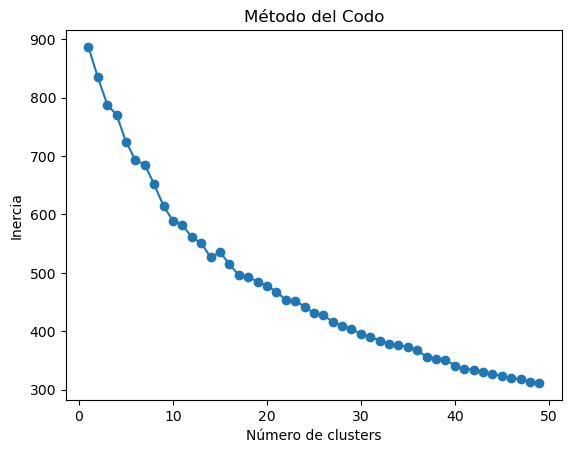

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(1, 50):  # Probar entre 1 y 20 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 50), inertia, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

### PipeLine

In [54]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Cargar el modelo de SpaCy para español
nlp = spacy.load('es_core_news_sm')

# Preprocesamiento del texto
def preprocess_text(text):
    doc = nlp(text.lower())  # Convertir a minúsculas y procesar
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_stop]
    return ' '.join(tokens)

# Preprocesamiento inicial
df = df[df["Duracion_Estancia_Min"] <= 10100]
df['processed_Queja_Principal'] = df['Queja_Principal'].apply(preprocess_text)

# Crear nuevas características y limpiar datos
df['cluster'] = KMeans(n_clusters=21, random_state=0).fit_predict(
    TfidfVectorizer().fit_transform(df['processed_Queja_Principal'])
)

data = df.copy()

# Conversión de String a float y otras transformaciones
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)
data['dolor_NRS'] = pd.to_numeric(data['dolor_NRS'].replace('#BOÞ!', 1))
data['Modo_Llegada'] = data['Modo_Llegada'].replace({6: 5, 7: 5})

# Eliminar columnas irrelevantes
data = data.drop(columns=['Queja_Principal', 'Diagnostico_En_Urgencias', 'Saturacion',
                          'DBP', 'KTAS_enfermera', 'Error_Triaje', 'Dolor', 
                          'Grupo_De_Error', 'Grupo'])

# Separar la variable objetivo
excluded_columns = ['Duracion_Estancia_Min']
X = data.loc[:, ~data.columns.isin(excluded_columns)]
Y = data[['Duracion_Estancia_Min']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Pipeline para procesamiento y modelado
columnas_imputar = ['SBP', 'HR', 'RR', 'BT']
columns_to_encode = ['Sexo', 'Disposicion', 'KTAS_experto', 'Modo_Llegada', 'Lesion', 'Estado_Mental']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), columnas_imputar),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ]
)

# Crear el modelo y entrenarlo
model = LinearRegression()

pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regression_model', model)
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular MSE y RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


ValueError: could not convert string to float: 'ant chest pain'